#### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import roc_auc_score, log_loss, recall_score,accuracy_score,precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,  KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import xgboost
import time

import keras
import keras_metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout


import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
def metrics(x,real, clf):
    print('roc_auc: ',roc_auc_score(real,clf.predict(x)))
    print('recall: ',recall_score(real,clf.predict(x)))
    print('accuracy: ',accuracy_score(real,clf.predict(x)))
    print('precision: ',precision_score(real,clf.predict(x)))
    return pd.DataFrame({'real':real,'predict':clf.predict(x),'proba1':clf.predict_proba(x)[:,1]})
def metrics2(real,x):
    print('roc_auc: ',roc_auc_score(real,x))
    print('recall: ',recall_score(real,x))
    print('precision: ',precision_score(real,x))
    return pd.DataFrame({'real':real,'predict':x,})

#### Считывание данных

In [3]:
data = pd.read_excel('ds2.xlsx')

#### Удаление пропусков

In [4]:
for i in data.columns:
    if data[i].isna().sum()!=0:
        data[i] = data[i].fillna(0)

#### Разделение на целевую переменную и предикторы

In [5]:
X = data.drop('class',axis=1)
y = data['class']

#### Масштабирование

In [6]:
XScale = pd.DataFrame(preprocessing.scale(X))
XScale.columns = X.columns
X=XScale

In [7]:
scaler=preprocessing.StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

#### Распределение целевой переменной

In [8]:
y.value_counts()

0    390
1    253
Name: class, dtype: int64

#### Отбор важности признаков

In [9]:
forest = RandomForestClassifier(n_estimators=4500, max_depth = 20, n_jobs=-1,
                                      random_state=1234).fit(X, y)

In [10]:
forest_predictions = forest.predict(X)
features = pd.DataFrame(forest.feature_importances_, index=X.columns,
                        columns=['Importance']).sort_values(['Importance'], ascending=False)
features.head(15)

,Importance
minEnergy20,0.013970
minEnergy15,0.013576
totalEnergy30,0.013268
count2500_7,0.012981
count2500_30,0.012311
count2500_10,0.012303
count2500_15,0.011920
count2500_20,0.010909
totalEnergy7,0.010013
totalEnergy10,0.009277


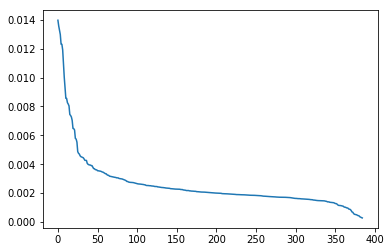

In [11]:
plt.plot(range(len(features.Importance.tolist())), 
         features.Importance.tolist())

In [12]:
col = features.index.tolist()
X1 = X[col]
X2 = X[col[:200]]
X3 = X[col[:120]]
X4 = X[col[:50]]
X5 = X[col[:20]]
X6 = X[col[:10]]

#### Разбиваем на тестовую и обучающую выборки

In [13]:
shuf = True

In [14]:
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.3,random_state=1234, shuffle=shuf)
X_train2, X_test2, y_train, y_test = train_test_split(X2, y, test_size=0.3,random_state=1234, shuffle=shuf)
X_train3, X_test3, y_train, y_test = train_test_split(X3, y, test_size=0.3,random_state=1234, shuffle=shuf)
X_train4, X_test4, y_train, y_test = train_test_split(X4, y, test_size=0.3,random_state=1234, shuffle=shuf)
X_train5, X_test5, y_train, y_test = train_test_split(X5, y, test_size=0.3,random_state=1234, shuffle=shuf)
X_train6, X_test6, y_train, y_test = train_test_split(X6, y, test_size=0.3,random_state=1234, shuffle=shuf)

## Построение моделей

### Логистическая регрессия

In [395]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train1, y_train, cv=kf, scoring='recall').mean()) 

0.5754560458502604


In [396]:
lr.fit(X_train1,y_train)
a=metrics(X_test1,y_test,lr)

roc_auc:  0.6782247765006386
recall:  0.6379310344827587
accuracy:  0.694300518134715
precision:  0.49333333333333335


In [397]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train2, y_train, cv=kf, scoring='recall').mean()) 

0.6029347434762374


In [398]:
lr.fit(X_train2,y_train)
a=metrics(X_test2,y_test,lr)

roc_auc:  0.6659003831417624
recall:  0.6206896551724138
accuracy:  0.6839378238341969
precision:  0.48


In [399]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train3, y_train, cv=kf, scoring='recall').mean()) 

0.6334709077852212


In [400]:
lr.fit(X_train3,y_train)
a=metrics(X_test3,y_test,lr)

roc_auc:  0.6905491698595146
recall:  0.6551724137931034
accuracy:  0.7046632124352331
precision:  0.5066666666666667


## Выбранная модель
### -----------------------------------------------------------------------

In [401]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train4, y_train, cv=kf, scoring='recall').mean()) 

0.6543608829656982


In [402]:
lr.fit(X_train4,y_train)
a=metrics(X_test4,y_test,lr)

roc_auc:  0.7263090676883781
recall:  0.6896551724137931
accuracy:  0.7409326424870466
precision:  0.5555555555555556


### -----------------------------------------------------------------------

In [403]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train5, y_train, cv=kf, scoring='recall').mean()) 

0.6300109494526992


In [404]:
lr.fit(X_train5,y_train)
a=metrics(X_test5,y_test,lr)

roc_auc:  0.7275862068965517
recall:  0.6551724137931034
accuracy:  0.7564766839378239
precision:  0.5846153846153846


In [405]:
lr = LogisticRegression(solver = 'liblinear')
kf = KFold(n_splits=5,shuffle=shuf,random_state = 1234)
print(cross_val_score(lr, X_train6, y_train, cv=kf, scoring='recall').mean()) 

0.6253592455109344


In [406]:
lr.fit(X_train6,y_train)
a=metrics(X_test6,y_test,lr)

roc_auc:  0.7312899106002554
recall:  0.6551724137931034
accuracy:  0.7616580310880829
precision:  0.59375


### Метод ближайших соседей

In [312]:
clf = KNeighborsClassifier()

In [313]:
search = GridSearchCV(clf, {'n_neighbors':[8,15,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train1, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 8, 'weights': 'distance'}, 0.5564729550816933]

In [314]:
search = GridSearchCV(clf, {'n_neighbors':[8,15,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train2, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 15, 'weights': 'uniform'}, 0.5355733031105255]

In [315]:
search = GridSearchCV(clf, {'n_neighbors':[8,15,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train3, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 8, 'weights': 'distance'}, 0.579916966931856]

In [316]:
search = GridSearchCV(clf, {'n_neighbors':[8,15,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train4, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 8, 'weights': 'distance'}, 0.6309252947036691]

In [323]:
search = GridSearchCV(clf, {'n_neighbors':[6,7,8,15,21],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train5, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 7, 'weights': 'uniform'}, 0.6726662240208737]

In [319]:
search = GridSearchCV(clf, {'n_neighbors':[6,7,8,9],'weights':['uniform','distance']},
              n_jobs = -1,scoring= "recall",cv=kf).fit(X_train6, y_train)
[search.best_params_,search.best_score_]

[{'n_neighbors': 7, 'weights': 'uniform'}, 0.6457078435355224]

## -------------------------------------------------------------------------------------------------------------------------------

In [329]:
clf  = KNeighborsClassifier(n_neighbors=7)
print(cross_val_score(clf, X_train6, y_train, cv=kf, scoring='recall').mean())

0.645673933909228


In [330]:
a=metrics(X_test6,y_test,clf.fit(X_train6,y_train))

roc_auc:  0.6842403628117913
recall:  0.6031746031746031
accuracy:  0.7018633540372671
precision:  0.6229508196721312


### Градиентный бустинг

In [337]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[50,250,450,650],
              'max_depth': [5,10,15],'min_leaf_samples':[1,2,4]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train1, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

477.5710074901581


[{'max_depth': 15, 'min_leaf_samples': 1, 'n_estimators': 50},
 0.6349832414757971]

In [338]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[50,250,450,650],
              'max_depth': [5,10,15],'min_leaf_samples':[1,2,4]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train2, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

288.1733458042145


[{'max_depth': 10, 'min_leaf_samples': 1, 'n_estimators': 250},
 0.6323209375442717]

In [339]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[50,250,450,650],
              'max_depth': [5,10,15],'min_leaf_samples':[1,2,4]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train3, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

178.15581703186035


[{'max_depth': 10, 'min_leaf_samples': 1, 'n_estimators': 450},
 0.6537401009209649]

In [351]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[27,28,29],
              'max_depth': [9,10,11],'min_leaf_samples':[1,2,4]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train4, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

10.689690828323364


[{'max_depth': 10, 'min_leaf_samples': 1, 'n_estimators': 28},
 0.678487869627728]

In [341]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[50,250,450,650],
              'max_depth': [5,10,15],'min_leaf_samples':[1,2,4]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train5, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

43.98510479927063


[{'max_depth': 15, 'min_leaf_samples': 1, 'n_estimators': 250},
 0.6207592911522616]

In [342]:
a = time.time()
xgb = xgboost.XGBClassifier()
gs = GridSearchCV(xgb, {'n_estimators':[50,250,450,650],
              'max_depth': [5,10,15],'min_leaf_samples':[1,2,4]},
              n_jobs = -1,scoring= "recall",cv = kf).fit(X_train6, y_train)
print(time.time()-a)
[gs.best_params_,gs.best_score_]

29.276368618011475


[{'max_depth': 5, 'min_leaf_samples': 1, 'n_estimators': 50},
 0.6026398871651496]

## -------------------------------------------------------------------------------------------------------------------------------

In [352]:
xgb = xgboost.XGBClassifier(n_jobs = 4,n_estimators=28,max_depth =10,min_leaf_samples=1,scoring='recall',cv = 5)

In [353]:
a = metrics(X_test4,y_test,xgb.fit(X_train4,y_train))

roc_auc:  0.7131519274376417
recall:  0.6507936507936508
accuracy:  0.7267080745341615
precision:  0.6507936507936508


In [354]:
print(cross_val_score(xgb, X_train4, y_train, cv=kf, scoring='recall').mean())

0.6786973810503223


## NN

In [56]:
len(X_train5.columns)

20

In [149]:
s = 20

In [179]:
model = Sequential()
model.add(Dense(10, input_dim=s,activation='sigmoid'))
model.add(Dropout(5))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [180]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras_metrics.recall(),keras_metrics.precision()])

In [186]:
model.fit(X_train5, y_train, epochs=10, batch_size=10,  verbose=2)

Epoch 1/10
 - 0s - loss: 0.5621 - recall: 0.6205 - precision: 0.6914
Epoch 2/10
 - 0s - loss: 0.5586 - recall: 0.6359 - precision: 0.6889
Epoch 3/10
 - 0s - loss: 0.5556 - recall: 0.6462 - precision: 0.6848
Epoch 4/10
 - 0s - loss: 0.5521 - recall: 0.6359 - precision: 0.6851
Epoch 5/10
 - 0s - loss: 0.5494 - recall: 0.6359 - precision: 0.6851
Epoch 6/10
 - 0s - loss: 0.5469 - recall: 0.6513 - precision: 0.6902
Epoch 7/10
 - 0s - loss: 0.5445 - recall: 0.6462 - precision: 0.6923
Epoch 8/10
 - 0s - loss: 0.5427 - recall: 0.6462 - precision: 0.6923
Epoch 9/10
 - 0s - loss: 0.5416 - recall: 0.6462 - precision: 0.7000
Epoch 10/10
 - 0s - loss: 0.5400 - recall: 0.6462 - precision: 0.7079


In [191]:
predictions = model.predict(X_test5).ravel()
pred=[]
for i in predictions:
    if i>0.55:
        pred.append(1)
    else:
        pred.append(0)
a = pd.DataFrame({'real':y_test,'pred':pred,'p':predictions})
print([sum(y_test),len(a[a['real']==1][a['pred']==1])])

[58, 38]


In [192]:
b = metrics2(y_test,pred)

roc_auc:  0.7386973180076628
recall:  0.6551724137931034
precision:  0.6129032258064516


In [170]:
len(X_train3.columns)

120

In [171]:
s = 120

In [198]:
model = Sequential()
model.add(Dense(60, input_dim=s,activation='sigmoid'))
model.add(Dropout(30))
model.add(Dense(30, activation='sigmoid'))
model.add(Dropout(15))
model.add(Dense(15, activation='sigmoid'))
model.add(Dropout(7))
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(3))
model.add(Dense(1, activation='sigmoid'))

In [199]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras_metrics.recall(),keras_metrics.precision()])

In [211]:
model.fit(X_train3, y_train, epochs=10, batch_size=25,  verbose=2)

Epoch 1/10
 - 0s - loss: 0.5943 - recall: 0.6667 - precision: 0.7602
Epoch 2/10
 - 0s - loss: 0.5834 - recall: 0.6821 - precision: 0.7733
Epoch 3/10
 - 0s - loss: 0.5733 - recall: 0.6769 - precision: 0.7811
Epoch 4/10
 - 0s - loss: 0.5627 - recall: 0.6821 - precision: 0.7870
Epoch 5/10
 - 0s - loss: 0.5531 - recall: 0.7077 - precision: 0.7931
Epoch 6/10
 - 0s - loss: 0.5448 - recall: 0.7077 - precision: 0.7931
Epoch 7/10
 - 0s - loss: 0.5376 - recall: 0.6974 - precision: 0.7907
Epoch 8/10
 - 0s - loss: 0.5309 - recall: 0.7282 - precision: 0.7889
Epoch 9/10
 - 0s - loss: 0.5224 - recall: 0.7385 - precision: 0.8000
Epoch 10/10
 - 0s - loss: 0.5159 - recall: 0.7333 - precision: 0.8079


In [212]:
predictions = model.predict(X_test3).ravel()
pred=[]
for i in predictions:
    if i>0.5:
        pred.append(1)
    else:
        pred.append(0)
a = pd.DataFrame({'real':y_test,'pred':pred,'p':predictions})
print([sum(y_test),len(a[a['real']==1][a['pred']==1])])

[58, 39]


In [213]:
b = metrics2(y_test,pred)

roc_auc:  0.7325031928480205
recall:  0.6724137931034483
precision:  0.582089552238806
